In [1]:
## Importing packages
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

In [2]:
## Generating data
torch.manual_seed(1)
N = 200
true_b0 = 1.5
true_b1 = -2.0

x = 0.25*torch.randn(N, 1)                   # shape (N, 1)
eps = 0.1 * torch.randn(N, 1)
y = true_b0 + true_b1 * x + eps 

In [3]:
## Forming P matrix
x_bar = x.mean()
x_sq_bar = (x**2).mean()

xy_bar = (x*y).mean()
y_bar = y.mean()

c = torch.tensor([[y_bar],[xy_bar]])

P = torch.tensor([[1.0,x_bar],[x_bar,x_sq_bar]])

β = torch.inverse(P)@c

eigenvalues = torch.linalg.eigvalsh(P)

μ_max = eigenvalues.max().item()

In [4]:
## Divergent case

In [5]:
## define the linear function (neural net)
model = nn.Linear(in_features=1, out_features=1)

with torch.no_grad():
    model.weight.fill_(0.0)   # sets w = 0
    model.bias.fill_(0.0)     # sets b = 0


## setting the optimizer
learning_rate = (1/μ_max)*(1.01)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

b0_list_diverge = []
b1_list_diverge = []

num_steps = 100

for t in range(num_steps):
    b0_hat = model.bias.item()
    b1_hat = model.weight.item()

    # Save them
    b0_list_diverge.append(b0_hat)
    b1_list_diverge.append(b1_hat)

    # Forward pass
    y_pred = model(x)

    # Compute loss
    loss = criterion(y_pred, y)

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Gradient descent update
    optimizer.step()

    # Extract parameters
   

    # Optional printout
    #print(f"step {t:4d} | loss = {loss:.5f} | b0 = {b0_hat:.3f}, b1 = {b1_hat:.3f}")

b0_array_div = np.array(b0_list_diverge)
b1_array_div = np.array(b1_list_diverge)

In [6]:
## Convergant case

In [7]:
## define the linear function (neural net)
model = nn.Linear(in_features=1, out_features=1)

with torch.no_grad():
    model.weight.fill_(0.0)   # sets w = 0
    model.bias.fill_(0.0)     # sets b = 0


## setting the optimizer
learning_rate = (1/μ_max)*(0.9)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

b0_list_convergent = []
b1_list_convergent = []

num_steps = 100

for t in range(num_steps):
    b0_hat = model.bias.item()
    b1_hat = model.weight.item()

    # Save them
    b0_list_convergent.append(b0_hat)
    b1_list_convergent.append(b1_hat)

    # Forward pass
    y_pred = model(x)

    # Compute loss
    loss = criterion(y_pred, y)

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Gradient descent update
    optimizer.step()

    # Extract parameters
   

    # Optional printout
    #print(f"step {t:4d} | loss = {loss:.5f} | b0 = {b0_hat:.3f}, b1 = {b1_hat:.3f}")
b0_array_conv= np.array(b0_list_convergent)
b1_array_conv = np.array(b1_list_convergent)

In [8]:
## Plotting the results

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm

fontsize= 14
ticksize = 18
figsize = (10, 6)
params_fig = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params_fig)

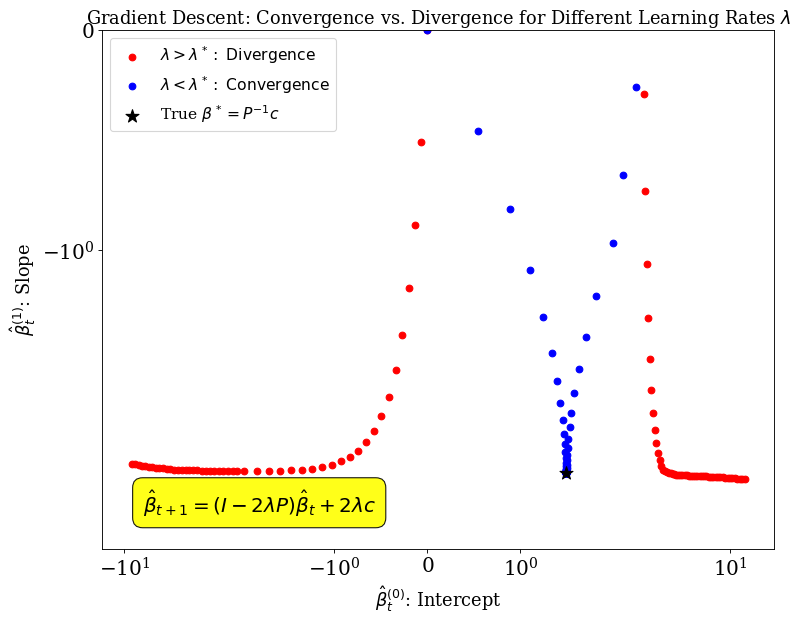

In [10]:
x_low_lim  = 1.5 * b0_array_div.min()
x_high_lim = 1.5 * b0_array_div.max()

y_low_lim  = 1.5 * b1_array_div.min()
y_high_lim = 1.5 * b1_array_div.max()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# --- Scatter plots for convergence and divergence ---
ax.scatter(b0_array_div,  b1_array_div,  color="r", label=r"$\lambda>\lambda^*:~\mathrm{Divergence}$")
ax.scatter(b0_array_conv, b1_array_conv, color="b", label=r"$\lambda<\lambda^*:~\mathrm{Convergence}$")
ax.scatter(β[0], β[1], color='k', marker='*', s=150, label=r'True $\beta^* = P^{-1}c$')
equation = (
    r"$\hat{\beta}_{t+1} = (I-2\lambda P)\hat{\beta}_t + 2\lambda c$"
)


ax.text(
    0.06, 0.06,
    equation,
    transform=ax.transAxes,
    fontsize=18,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(
        boxstyle='round,pad=0.5',
        facecolor='yellow',
        edgecolor='black',
        alpha=0.9
    )
)



# --- Labels and Title ---
ax.set_xlabel(r'$\hat{\beta}^{(0)}_t$: Intercept', fontsize=16)
ax.set_ylabel(r'$\hat{\beta}^{(1)}_t$: Slope', fontsize=16)
ax.set_title(r"Gradient Descent: Convergence vs. Divergence for Different Learning Rates $\lambda$", fontsize=16)

# --- Axis limits ---
ax.set_xlim(x_low_lim, x_high_lim)
ax.set_ylim(y_low_lim, y_high_lim)

# --- Symmetric log scale ---
ax.set_xscale("symlog")
ax.set_yscale("symlog")

ax.legend()

plt.tight_layout()
plt.show()


## Making the animation

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # use v2 API to avoid warning

b0_array_div[:0]

array([], dtype=float64)

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # use v2 API to avoid warning

b0_array_div[:0]

array([], dtype=float64)

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec


In [14]:
def loss_numpy_path(beta_0,beta_1,x,y):
    x_np = x.numpy()   # shape (N,)
    y_np = y.numpy()   # shape (N,)
    error = y_np- beta_0 - beta_1*x_np
    mse = (error**2).mean(axis = 0)
    return mse

In [15]:
def plot_loss_surface(ax, b0_array_for_range, b1_array_for_range, x, y, cmap='viridis', alpha=0.7):
    """
    Plot the 3D loss surface.

    Parameters
    ----------
    ax : 3D matplotlib axis
    b0_array_for_range, b1_array_for_range : array-like
        Arrays to define the min/max range of the surface.
    x, y : torch tensors
        Data used to compute the loss.
    cmap : str
        Colormap for the surface.
    alpha : float
        Transparency of the surface.
    """
    b0_min, b0_max = 1.1 * np.min(b0_array_for_range), 1.1 * np.max(b0_array_for_range)
    b1_min, b1_max = 1.1 * np.min(b1_array_for_range), 1.1 * np.max(b1_array_for_range)

    pad0 = 0.1 * (b0_max - b0_min)
    pad1 = 0.1 * (b1_max - b1_min)

    b0_grid = np.linspace(b0_min - pad0, b0_max + pad0, 50)
    b1_grid = np.linspace(b1_min - pad1, b1_max + pad1, 50)

    B0, B1 = np.meshgrid(b0_grid, b1_grid)

    Z = np.zeros_like(B0)
    for i in range(B0.shape[0]):
        for j in range(B0.shape[1]):
            Z[i, j] = loss_numpy_path(B0[i, j].item(), B1[i, j].item(), x, y)

    ax.plot_surface(B0, B1, Z, cmap=cmap, alpha=alpha)

    # Remove grid lines
    ax.xaxis._axinfo["grid"]["linewidth"] = 0
    ax.yaxis._axinfo["grid"]["linewidth"] = 0
    ax.zaxis._axinfo["grid"]["linewidth"] = 0


In [16]:
x_low_div_lim  = 1.1 * (b0_array_div.min()-0.1)
x_high_div_lim = 1.1 * (b0_array_div.max()+0.1)

y_low_div_lim  = 1.1 * (b1_array_div.min()-0.1)
y_high_div_lim = 1.1 * (b1_array_div.max()+0.1)

x_low_conv_lim  = 1.1 * (b0_array_conv.min()-0.1)
x_high_conv_lim = 1.1 * (b0_array_conv.max()+0.1)

y_low_conv_lim  = 1.1 * (b1_array_conv.min()-0.1)
y_high_conv_lim = 1.1 * (b1_array_conv.max()+0.1)


In [17]:

filenames = []

for i in range(num_steps):  # Start from 1 to avoid empty arrays
    for t in range(10):  # Your original t loop for slower animation
        # Create a new figure for each frame
        
        fig = plt.figure(figsize=(16, 14))
        gs = gridspec.GridSpec(2, 2, height_ratios=[2.2, 1])   # enlarge top row

        # Top-left
        ax1 = fig.add_subplot(gs[0, 0], projection='3d')
        plot_loss_surface(ax1, b0_array_conv, b1_array_conv, x, y, cmap='viridis', alpha=0.7)
        path_conv_loss = loss_numpy_path(b0_array_conv[:i],b1_array_conv[:i],x,y)
        ax1.plot(b0_array_conv[:i], b1_array_conv[:i], path_conv_loss, color="b", linewidth=3)
        ax1.set_xticklabels([]) 
        ax1.set_yticklabels([])
        ax1.set_title(r"Convergent Path: Learning Rate $\lambda< \lambda^*$", fontsize = 22)
        ax1.text2D(0.30, 0.95, f"Optimization step: {i}/{num_steps-1}", transform=ax1.transAxes, fontsize=18, color='k',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
        ax1.set_xlabel(r'$\hat{\beta}^{(0)}_t$: Intercept', fontsize=22)
        ax1.set_ylabel(r'$\hat{\beta}^{(1)}_t$: Slope', fontsize=22)

        # Top-right
        ax2 = fig.add_subplot(gs[0, 1], projection='3d')
        plot_loss_surface(ax2, b0_array_div, b1_array_div, x, y, cmap='viridis', alpha=0.7)
        path_div_loss = loss_numpy_path(b0_array_div[:i],b1_array_div[:i],x,y)
        ax2.plot(b0_array_div[:i], b1_array_div[:i], path_div_loss, color="r", linewidth=3)
        ax2.set_xticklabels([]) 
        ax2.set_yticklabels([])
        ax2.set_title(r"Divergent Path: Learning Rate $\lambda> \lambda^*$", fontsize = 22)
        ax2.text2D(1.5, 0.95, f"Optimization step: {i}/{num_steps-1}", transform=ax1.transAxes, fontsize=18, color='k',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
        ax2.set_xlabel(r'$\hat{\beta}^{(0)}_t$: Intercept', fontsize=22)
        ax2.set_ylabel(r'$\hat{\beta}^{(1)}_t$: Slope', fontsize=22)

        # Bottom-left
        ax3 = fig.add_subplot(gs[1, 0])
        ax3.scatter(b0_array_conv[:i], b1_array_conv[:i], color="b", linewidth=3)
        ax3.set_title(r"Convergent Path: Learning Rate $\lambda< \lambda^*$", fontsize = 22)
        ax3.set_xlabel(r'$\hat{\beta}^{(0)}_t$: Intercept', fontsize=22)
        ax3.set_ylabel(r'$\hat{\beta}^{(1)}_t$: Slope', fontsize=22)
        ax3.scatter(β[0], β[1], color='k', marker='*', s=150, label=r'$\beta^*$')
        ax3.set_xlim(x_low_conv_lim, x_high_conv_lim)
        ax3.set_ylim(y_low_conv_lim, y_high_conv_lim)
        ax3.legend(fontsize=24, loc='lower left')


        # Bottom-right
        ax4 = fig.add_subplot(gs[1, 1])
        ax4.scatter(b0_array_div[:i], b1_array_div[:i], color="r", linewidth=3)
        ax4.set_title(r"Divergent Path: Learning Rate $\lambda> \lambda^*$", fontsize = 22)
        ax4.set_xlabel(r'$\hat{\beta}^{(0)}_t$: Intercept', fontsize=22)
        ax4.set_ylabel(r'$\hat{\beta}^{(1)}_t$: Slope', fontsize=22)
        ax4.scatter(β[0], β[1], color='k', marker='*', s=150, label=r'$\beta^*$')
        ax4.set_xlim(x_low_div_lim, x_high_div_lim)
        ax4.set_ylim(y_low_div_lim, y_high_div_lim)
        ax4.legend(fontsize=24, loc='upper right')



        plt.subplots_adjust(
            wspace=0.15,
            hspace=0.25,
            left=0.05, right=1.3,
            top=0.95, bottom=0.05
                )
        
        filename = f'frame_{i:03d}_{t:02d}.png'
        plt.savefig(filename, dpi=100, bbox_inches='tight')
        filenames.append(filename)
        plt.close()  # Close each figure

# Build gif
with imageio.get_writer('GD.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
for filename in filenames:
    os.remove(filename)

C:\Users\mahdi\AppData\Local\Temp\ipykernel_6412\763545469.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = loss_numpy_path(B0[i, j].item(), B1[i, j].item(), x, y)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_6412\763545469.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = loss_numpy_path(B0[i, j].item(), B1[i, j].item(), x, y)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_6412\763545469.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z